<a href="https://colab.research.google.com/github/imabubakr/Geospatial-Analysis-and-Visualization/blob/main/weather_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary packages
# GitHub package installation tool
library(remotes)
# Install 'climate' package from GitHub
install_github("bczernecki/climate")
install.packages("maps")
install.packages("ggplot2")
install.packages("ggridges")
install.packages("viridis")
install.packages("gridExtra")

openssl (2.0.6 -> 2.1.1    ) [CRAN]
curl    (5.0.2 -> 5.2.0    ) [CRAN]
XML     (NA    -> 3.99-0.16) [CRAN]


Installing 3 packages: openssl, curl, XML

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpjdrqEn/remotes1235c5c28b1/bczernecki-climate-9c168a6/DESCRIPTION’ ... OK
* preparing ‘climate’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘climate_1.1.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:maps’:

    unemp




[1] "http://ogimet.com/cgi-bin/gsynres?lang=en&state=Germany&osum=no&fmt=html&ord=REV&ano=2024&mes=01&day=15&hora=06&ndays=1&Send=send"


/tmp/RtmpjdrqEn/file12318ae467a



   wmo_id           station_names       lon      lat  alt  distance
67  10908 Feldberg / Schwarzwald   8.000000 47.86668 1486  22.64029
61  10805                   Lahr   7.816683 48.35001  156  39.72113
62  10815           Freudenstadt   8.400008 48.45001  797  80.26965
54  10731           Rheinstetten   8.316673 48.96669  116 120.90940
68  10929               Konstanz   9.116669 47.68335  428 146.83837
52  10708 Saarbruecken / Ensheim   7.100002 49.20000  319 158.80486
55  10738 Stuttgart-Echterdingen   9.216671 48.68335  371 171.96725
53  10729               Mannheim   8.550011 49.50001   98 186.18998
45  10616                   Hahn   7.250005 49.93335  497 227.29212
56  10742              Oehringen   9.516677 49.20000  276 230.96074
63  10836               Stoetten   9.850017 48.65001  734 236.46226
44  10609       Trier-Petrisberg   6.650013 49.73335  265 236.54172
46  10637         Frankfurt/Main   8.516677 50.01667  100 238.74230
47  10641   Offenbach-Wetterpark   8.783349 50.0

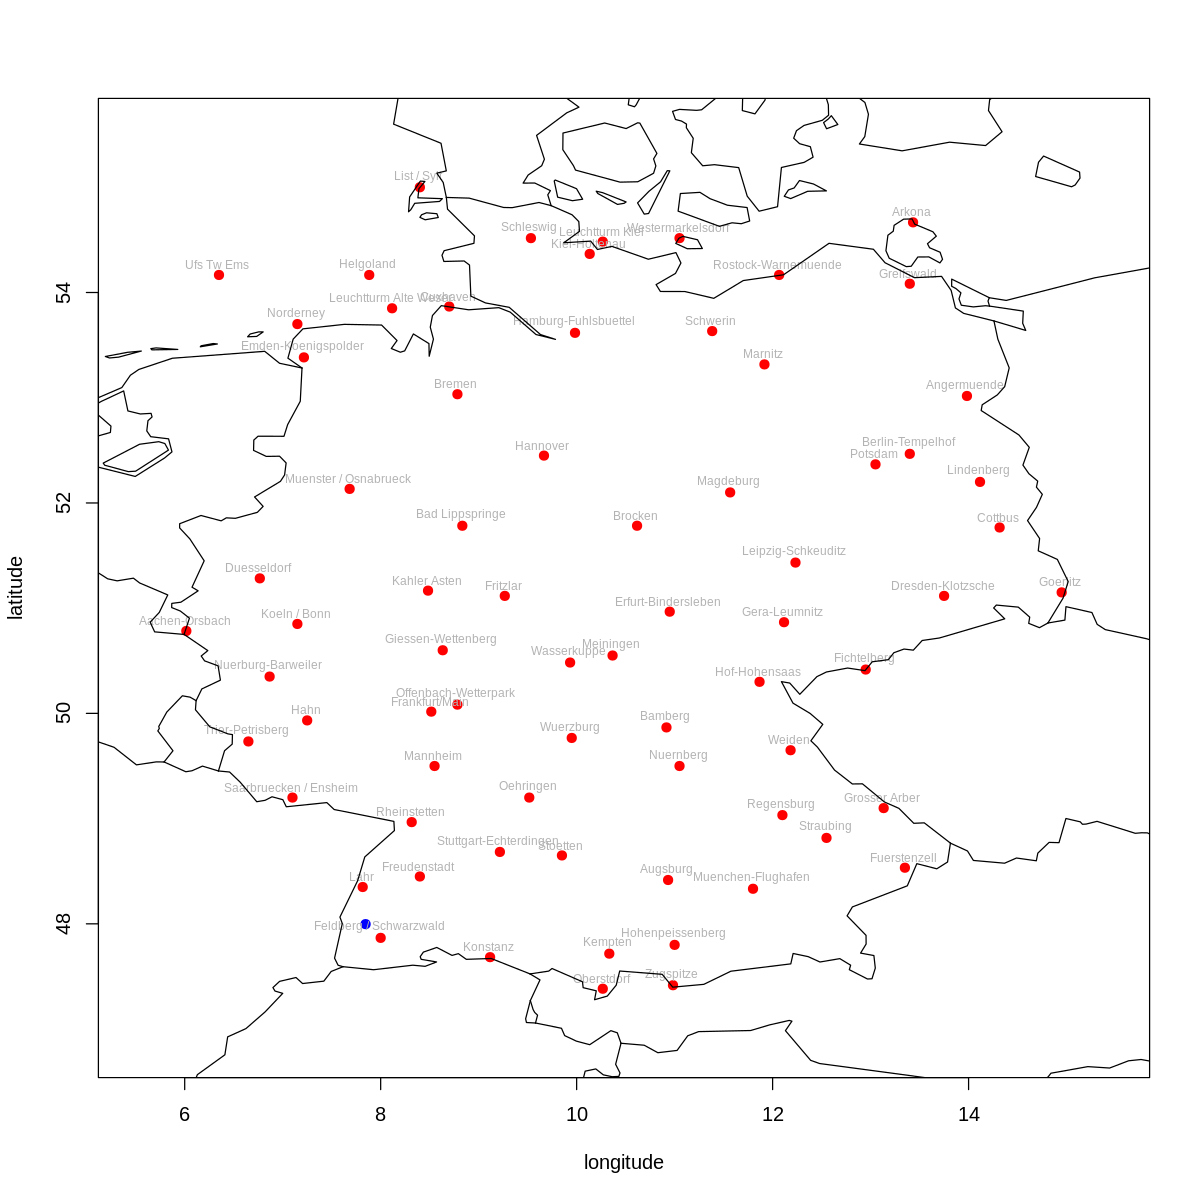

In [2]:
#load the installed packages
library(climate)
library(maps)
library(ggplot2)
library(ggridges)
library(viridis)
library(gridExtra)
# Coordinates for Freiburg, Germany (latitude and longitude)
freiburg_coordinates <- c(7.8461, 47.9972)

# Set the size of the plot
options(
  repr.plot.width = 10,    # Set the width to 8 inches
  repr.plot.height = 10   # Set the height to 6 inches
)

# Use the nearest_stations_ogimet function for Freiburg
nearest_stations <- nearest_stations_ogimet(
  country = "Germany",  # Specify the correct country
  date = Sys.Date(),
  add_map = TRUE,
  point = freiburg_coordinates,  # Coordinates for Freiburg
  no_of_stations = 100
)

# View the result
print(nearest_stations)

In [3]:
# Unfortunately, I couldn't find information for this specific station https://weather.uni-freiburg.de/info_en.php.
# Let's fetch the weather data from the Feldberg station.
# Specify the station number using its WMO ID.
station_id <- 10908

# Define the date range for the year 2022.
start_date <- as.Date("2022-01-01")
end_date <- as.Date("2022-12-31")

# Download meteorological data for all available variables.
data_2022_all <- meteo_ogimet(
  date = c(start_date, end_date),
  interval = "daily",
  coords = FALSE,
  station = station_id
)


Daily raports will be generated for 6 UTC each day. Use the >>hour<< argument to change it 




[1] 10908
  |                                                                      |   0%[1] "https://www.ogimet.com/cgi-bin/gsynres?lang=en&ind=10908&ndays=32&ano=2022&mes=12&day=31&hora=6&ord=REV&Send=Send"


/tmp/RtmpjdrqEn/file12323e44f0d



  |======                                                                |   8%[1] "https://www.ogimet.com/cgi-bin/gsynres?lang=en&ind=10908&ndays=32&ano=2022&mes=12&day=01&hora=6&ord=REV&Send=Send"


/tmp/RtmpjdrqEn/file1238a3c9fe



  |============                                                          |  17%[1] "https://www.ogimet.com/cgi-bin/gsynres?lang=en&ind=10908&ndays=32&ano=2022&mes=11&day=01&hora=6&ord=REV&Send=Send"


/tmp/RtmpjdrqEn/file123275664bb



  |==================                                                    |  25%[1] "https://www.ogimet.com/cgi-bin/gsynres?lang=en&ind=10908&ndays=32&ano=2022&mes=10&day=01&hora=6&ord=REV&Send=Send"


/tmp/RtmpjdrqEn/file1237e0a1db8



  |=======================                                               |  33%[1] "https://www.ogimet.com/cgi-bin/gsynres?lang=en&ind=10908&ndays=32&ano=2022&mes=09&day=01&hora=6&ord=REV&Send=Send"


/tmp/RtmpjdrqEn/file12369f67017



  |=============================                                         |  42%[1] "https://www.ogimet.com/cgi-bin/gsynres?lang=en&ind=10908&ndays=32&ano=2022&mes=08&day=01&hora=6&ord=REV&Send=Send"


/tmp/RtmpjdrqEn/file1236f27016a



  |===================================                                   |  50%[1] "https://www.ogimet.com/cgi-bin/gsynres?lang=en&ind=10908&ndays=32&ano=2022&mes=07&day=01&hora=6&ord=REV&Send=Send"


/tmp/RtmpjdrqEn/file12345bdcae6



  |=========================================                             |  58%[1] "https://www.ogimet.com/cgi-bin/gsynres?lang=en&ind=10908&ndays=32&ano=2022&mes=06&day=01&hora=6&ord=REV&Send=Send"


/tmp/RtmpjdrqEn/file123925a16f



  |===============================================                       |  67%[1] "https://www.ogimet.com/cgi-bin/gsynres?lang=en&ind=10908&ndays=32&ano=2022&mes=05&day=01&hora=6&ord=REV&Send=Send"


/tmp/RtmpjdrqEn/file12325967f22



  |====================================================                  |  75%[1] "https://www.ogimet.com/cgi-bin/gsynres?lang=en&ind=10908&ndays=32&ano=2022&mes=04&day=01&hora=6&ord=REV&Send=Send"


/tmp/RtmpjdrqEn/file12313b8df6f



  |==========================================================            |  83%[1] "https://www.ogimet.com/cgi-bin/gsynres?lang=en&ind=10908&ndays=32&ano=2022&mes=03&day=01&hora=6&ord=REV&Send=Send"


/tmp/RtmpjdrqEn/file12372e6cf5



  |================================================================      |  92%[1] "https://www.ogimet.com/cgi-bin/gsynres?lang=en&ind=10908&ndays=32&ano=2022&mes=02&day=01&hora=6&ord=REV&Send=Send"


/tmp/RtmpjdrqEn/file123323893f9



  |======================================================================| 100%[1] "https://www.ogimet.com/cgi-bin/gsynres?lang=en&ind=10908&ndays=32&ano=2022&mes=01&day=01&hora=6&ord=REV&Send=Send"


/tmp/RtmpjdrqEn/file1231bbb6041



In [4]:
head(data_2022_all)

,station_ID,Date,TemperatureCAvg,TemperatureCMax,TemperatureCMin,TdAvgC,HrAvg,WindkmhDir,WindkmhInt,WindkmhGust,PreselevHp,Precmm,TotClOct,SunD1h,VisKm,SnowDepcm,PresslevHp,lowClOct
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
3,10908,2022-12-31,3.3,7.2,-1.3,3.4,99.1,SW,61.8,122.5,847.5,5.9,7.7,1.5,10.4,4,NA,NA
4,10908,2022-12-30,1.2,3.2,-1.3,0.8,98.0,SW,51.5,97.3,846.0,7.7,7.4,0.0,4.7,4,NA,NA
5,10908,2022-12-29,1.2,3.6,-2.7,-1.1,84.3,SW,60.8,111.7,847.7,NA,7.7,2.2,49.9,NA,NA,NA
6,10908,2022-12-28,-2.5,-1.3,-3.6,-3.4,93.4,SW,39.9,79.3,855.1,NA,7.5,1.5,21.9,NA,NA,NA
7,10908,2022-12-27,1.1,5.0,-3.3,0.5,97.2,WSW,52.1,104.5,853.0,10.6,7.7,0.0,11.4,NA,NA,NA
8,10908,2022-12-26,5.5,7.8,3.2,2.5,81.7,SW,50.4,93.7,849.6,NA,7.8,4.9,53.3,NA,NA,NA


In [5]:
# Generate a new dataframe focusing on specific variables and conduct data cleaning
# Select varibales of interest
selected_columns <- c("Date", "TemperatureCAvg", "WindkmhInt", "WindkmhDir")

# Create a new dataframe with the selected columns
selected_data <- data_2022_all[selected_columns]

# Remove rows with NA values
cleaned_data <- na.omit(selected_data)

# View the first few rows of the selected data
head(cleaned_data)


,Date,TemperatureCAvg,WindkmhInt,WindkmhDir
,<date>,<dbl>,<dbl>,<chr>
3,2022-12-31,3.3,61.8,SW
4,2022-12-30,1.2,51.5,SW
5,2022-12-29,1.2,60.8,SW
6,2022-12-28,-2.5,39.9,SW
7,2022-12-27,1.1,52.1,WSW
8,2022-12-26,5.5,50.4,SW


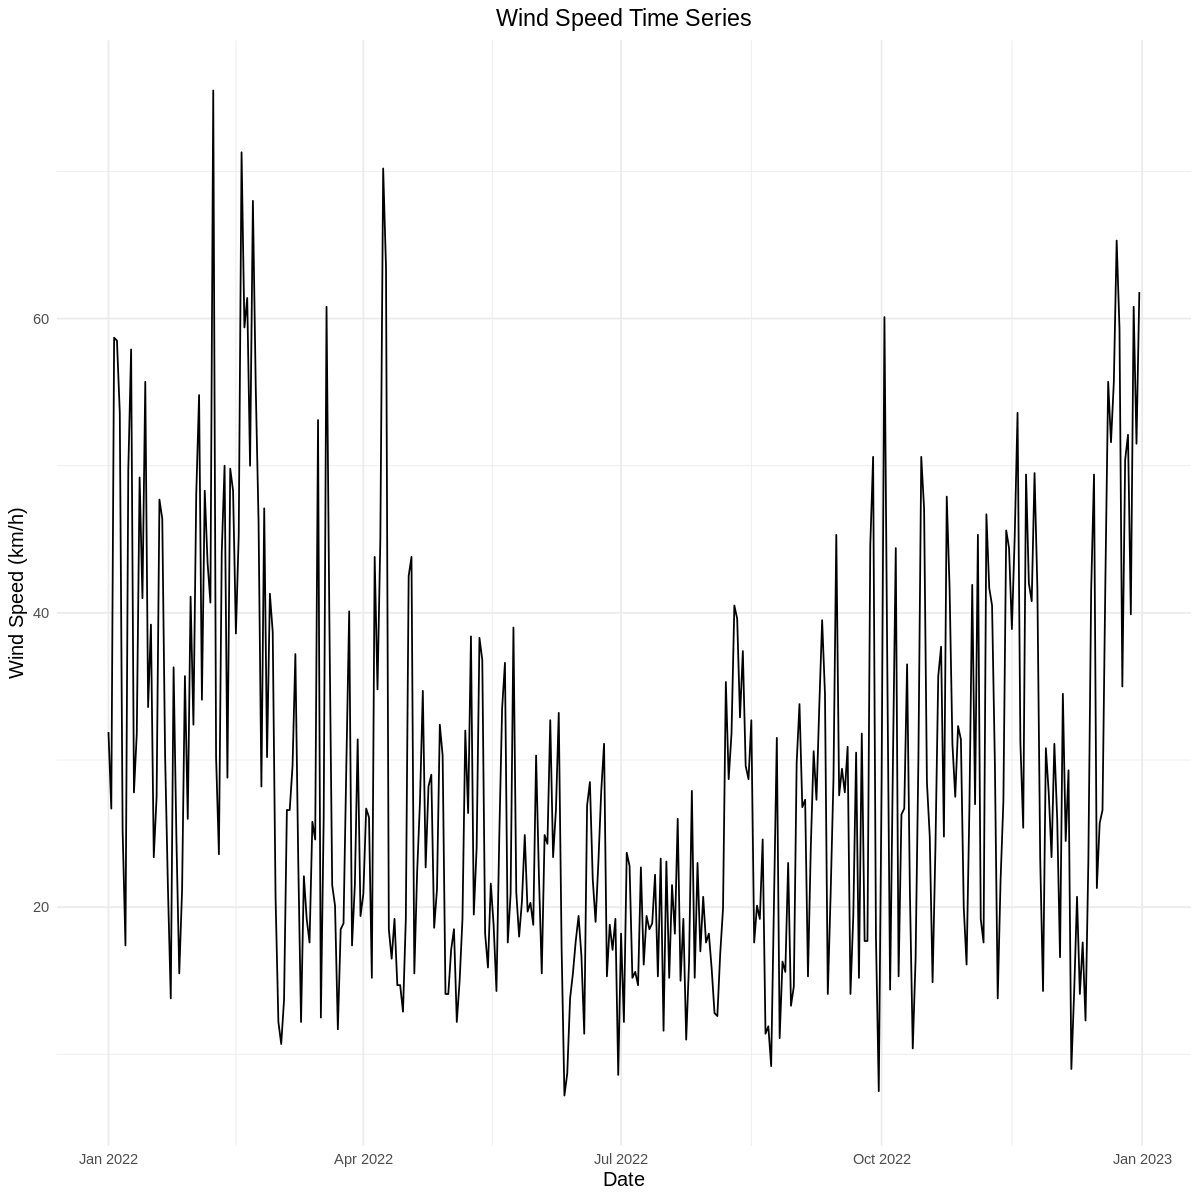

In [6]:
# Create a time series plot of wind speed
wind_speed_time_series <- ggplot(cleaned_data, aes(x = Date, y = WindkmhInt)) +
  geom_line(color = "black") +
  labs(
    title = "Wind Speed Time Series",
    x = "Date",
    y = "Wind Speed (km/h)"
  ) +
  theme_minimal() +
  theme(
    axis.title = element_text(size = 12),
    plot.title = element_text(size = 14, hjust = 0.5)
  )

# Display the wind speed time series plot
print(wind_speed_time_series)


Picking joint bandwidth of 1.69



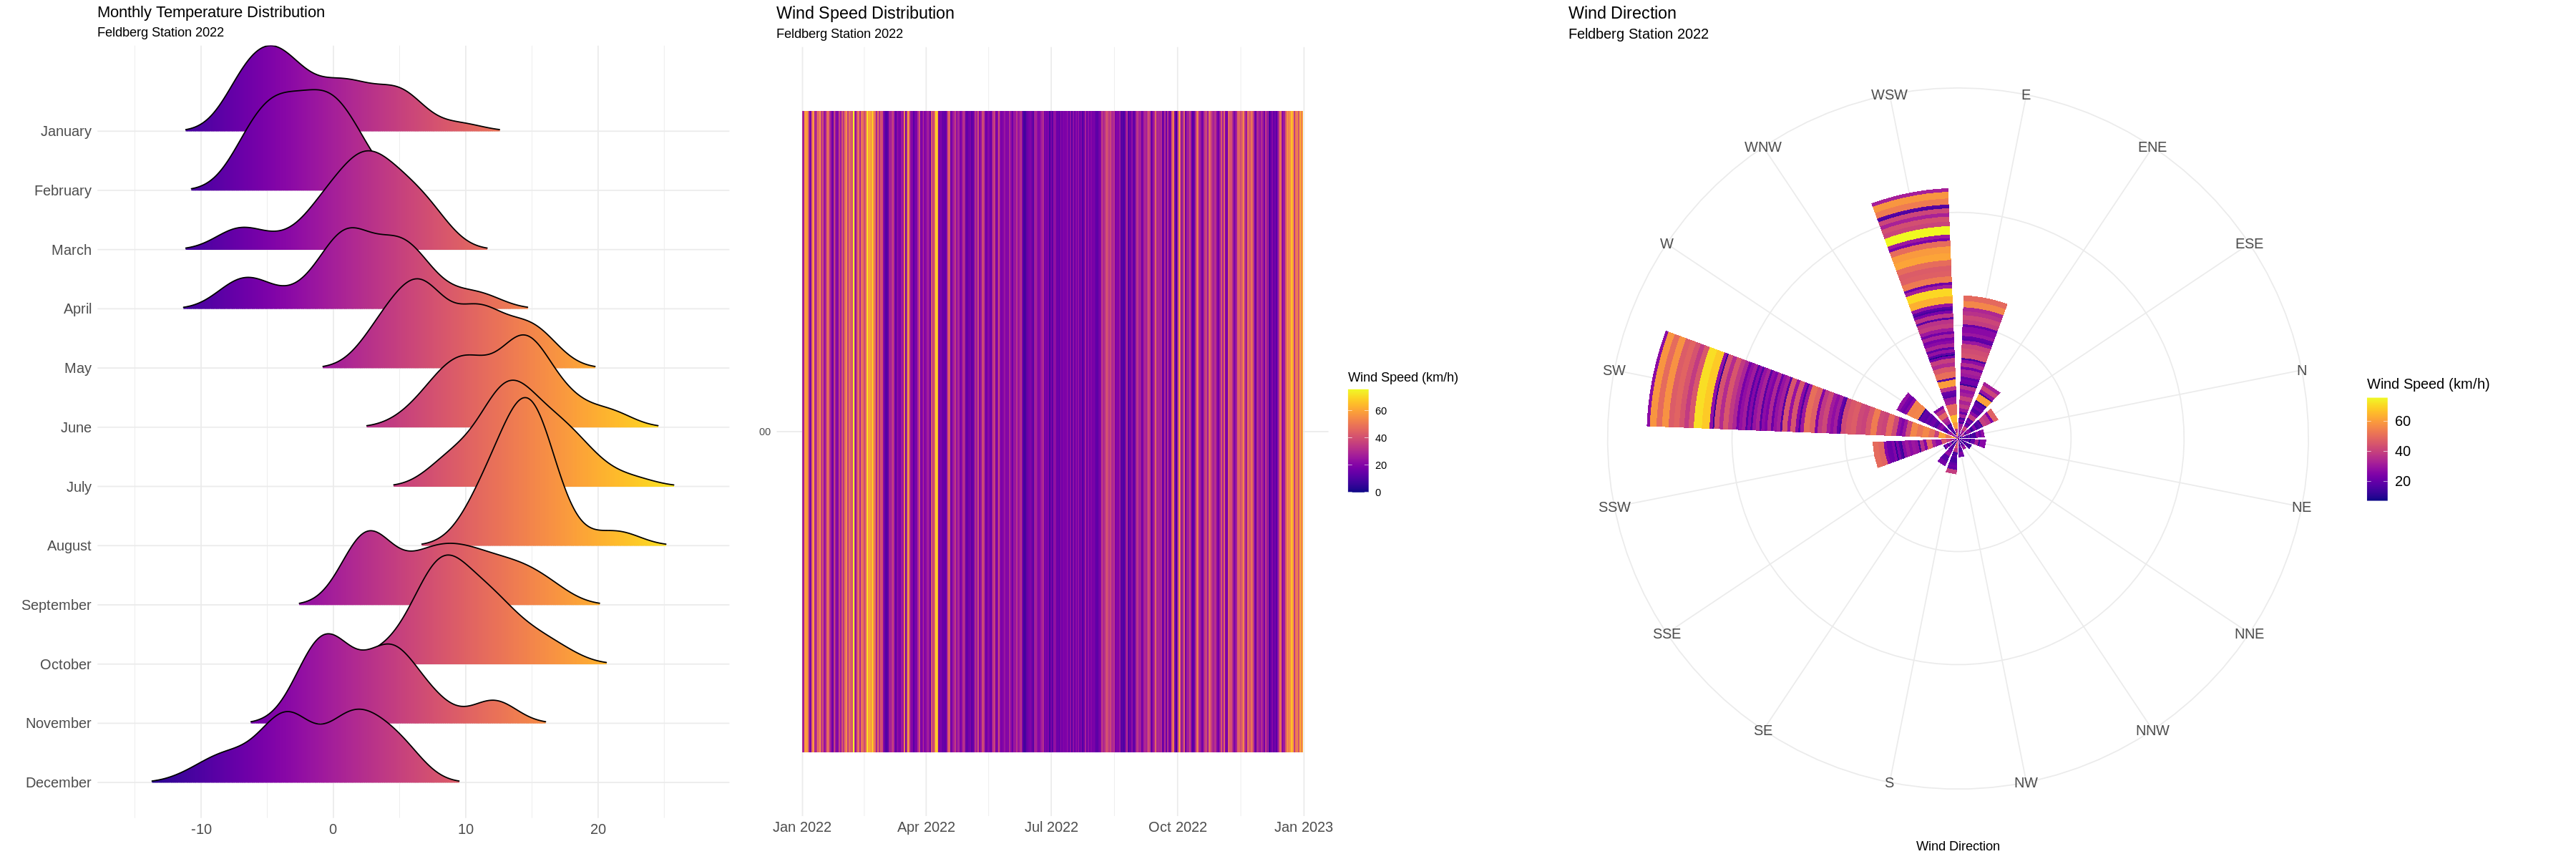

In [7]:

# Generate plots of interest side by side.
# Rridge plot (Temperature Distribution)
ridge_plot <- ggplot(cleaned_data, aes(x = TemperatureCAvg, y = factor(format(Date, "%B"), levels = rev(month.name)), fill = after_stat(x))) +
  geom_density_ridges_gradient(scale = 2.5, rel_min_height = 0.01) +
  scale_fill_viridis(name = "Temperature (°C)", option = "C") +
  labs(title = 'Monthly Temperature Distribution', subtitle = 'Feldberg Station 2022', x = "", y = "") +
  theme_minimal() +
  theme(
    legend.position = "none",
    panel.spacing = unit(0.1, "lines"),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    strip.text.x = element_text(size = 8)
  )

# Heat Map (Wind Speed Distribution)
wind_speed_heatmap <- ggplot(cleaned_data, aes(x = Date, y = format(Date, "%H"), fill = WindkmhInt)) +
  geom_tile() +
  scale_fill_viridis(name = "Wind Speed (km/h)", option = "C", limits = c(0, max(cleaned_data$WindkmhInt))) +
  labs(
    title = "Wind Speed Distribution",
    subtitle = 'Feldberg Station 2022',
    x = "",
    y = "",
    fill = "Wind Speed (km/h)"
  ) +
  theme_minimal() +
  theme(
    axis.title = element_text(size = 12),
    plot.title = element_text(size = 14),
    axis.text.x = element_text(size = 12),
  )

# Wind Rose (Wind Direction)
wind_rose_plot <- ggplot(cleaned_data, aes(x = factor(WindkmhDir), y = WindkmhInt, fill = WindkmhInt)) +
  geom_bar(stat = "identity", width = 0.8) +
  coord_polar(start = 0) +
  labs(title = "Wind Direction",
       subtitle = "Feldberg Station 2022",
       x = "Wind Direction",
       y = "") +
  scale_x_discrete() +
  scale_fill_viridis(name = "Wind Speed (km/h)",
                     option = "C") +
  theme_minimal() +
  theme(
    legend.position = "right",
    axis.text.x = element_text(angle = 0, hjust = 1, size = 12),
    axis.text.y = element_blank(),  # Remove numeric labels on the left
    plot.title = element_text(size = 14),
    plot.subtitle = element_text(size = 12),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 12)
  )

# Set the figure size (plot size)
options(
  repr.plot.width = 30,    # Set the width in inches
  repr.plot.height = 10    # Set the height in inches
)

# Arrange the three plots side by side with increased width for the third plot
grid.arrange(ridge_plot, wind_speed_heatmap, wind_rose_plot, ncol = 3, widths = c(2, 2, 3))
